# Assignment 4 - Different language
In this assignment, you need to work in the same groups you already are divided into. Now you need to do what you have done before in Assignments 1, 2 and 3, but in a different language. You have to apply the tasks on the dataset that you used in Assignment 1, 2, and 3. 

You will hand in the assignment through a Jupyter notebook, along with your environment and the dataset you picked, both zipped together and submitted as one file. Please name your file so that it contains your group number. It is important that you clearly state the tasks you are performing on the dataset as questions or something similar in the notebook before you do the operations on the data. Also make sure to document your solutions and your thinking so that it can easily be followed. If you fail to do these things, you may not pass this assignment.

The deadline of this assignment is on May 24, 2025 to get bonus points, or before the exam (in which case no bonus points are awarded).

Re-submission 1 is by the end of week 33, 2025.

Re-submission 2 is by the end of week 2, 2026.

---

### *Assignement 2*

# Exercice 4
The tasks are
- Regression
- Clustering
- Decision Trees and Model validation
- SVMs, Hyperparameters, and Cross-Validation

# Exercice 5
The tasks are:
- Permutation feature importance
- Statistical testing
- Dimensionality reduction


## Import and dataset

In [233]:
library(tidyverse)
library(mclust)
library(viridis)
library(tidymodels)
library(rpart.plot)
library(kernlab)
library(iml)

In [234]:
(df <- read.csv("../Total air emissions by greenhouse gas.csv", na.strings = ".."))

greenhouse.gas,sector,X1990,X1991,X1992,X1993,X1994,X1995,X1996,X1997,⋯,X2014,X2015,X2016,X2017,X2018,X2019,X2020,X2021,X2022,X2023
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Total Greenhouse Gases (kt CO2-eqv.),"NATIONAL TOTAL (excluding LULUCF, excluding international transports)",71203.3,71338.8,71022.5,71242.7,73749.3,73135.2,77030.2,72145.4,⋯,53481.9,53283.7,53198.3,52294.3,51434.3,50196.4,45981.9,47721.8,45215.4,44386.0
Total Greenhouse Gases (kt CO2-eqv.),"NATIONAL TOTAL (excluding LULUCF, including international transports)",74942.3,75103.8,74935.1,75408.3,78554.0,78019.4,82142.9,78075.2,⋯,61492.3,61348.7,62200.6,62518.3,60125.1,60011.4,55346.9,56335.5,54146.8,51956.4
Total Greenhouse Gases (kt CO2-eqv.),"NATIONAL TOTAL (including LULUCF, excluding international transports)",11863.2,12988.4,13579.8,17635.4,18592.5,17858.9,19616.0,13375.8,⋯,-4299.4,-2033.0,756.6,5922.3,11653.5,10429.0,6630.6,11055.3,11601.4,13162.4
Total Greenhouse Gases (kt CO2-eqv.),"NATIONAL TOTAL (including LULUCF, including international transports)",15602.2,16753.4,17492.4,21801.0,23397.2,22743.1,24728.6,19305.6,⋯,3710.9,6032.1,9758.9,16146.3,20344.3,20244.0,15995.5,19669.1,20532.8,20732.8
Total Greenhouse Gases (kt CO2-eqv.),"OFF-ROAD VEHICLES AND OTHER MACHINERY, TOTAL",3682.5,3773.5,4176.6,3930.2,3962.2,3747.9,3605.7,3636.9,⋯,2971.8,2990.7,2791.1,2760.0,2659.3,2823.8,2828.2,2889.0,2592.0,2705.9
Total Greenhouse Gases (kt CO2-eqv.),"WASTE, TOTAL",4275.1,4348.1,4361.5,4227.9,4081.4,4074.9,4046.2,4008.9,⋯,1761.5,1639.3,1558.2,1496.4,1398.7,1295.4,1232.7,1156.0,1103.0,1055.6
Total Greenhouse Gases (kt CO2-eqv.),"ELECTRICITY AND DISTRICT HEATING, TOTAL",6414.3,7383.4,7863.7,7750.7,8352.7,7500.4,11571.6,7108.4,⋯,4392.2,4562.5,4941.7,4417.0,4844.1,4421.0,3384.3,4072.1,3998.2,3800.7
Total Greenhouse Gases (kt CO2-eqv.),"INDUSTRY, TOTAL",20635.6,20329.4,19006.7,20169.9,21428.9,22220.4,22260.0,22302.6,⋯,16683.5,16415.4,16957.5,16986.6,16995.5,16334.4,14643.5,15772.6,15229.8,14786.6
Total Greenhouse Gases (kt CO2-eqv.),"DOMESTIC TRANSPORT, TOTAL",19319.7,19183.7,20092.2,19324.1,19942.4,20032.4,19789.1,19869.9,⋯,18664.9,18752.1,18088.9,17693.9,17002.8,16874.1,15474.9,15478.9,13951.4,13855.6


## Regression
Let's visualize the data for Total Greenhouse Gases (kt CO2-eqv.), NATIONAL TOTAL (excluding LULUCF, excluding international transports)	

[1] 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
[16] 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
[31] 2020 2021 2022 2023

[1] 71203.3 71338.8 71022.5 71242.7 73749.3 73135.2 77030.2 72145.4 72526.6
[10] 69370.9 68131.8 68886.2 69501.1 69812.4 69132.8 66251.5 65901.0 64741.8
[19] 62344.5 58122.7 64123.2 59742.6 56829.5 55209.9 53481.9 53283.7 53198.3
[28] 52294.3 51434.3 50196.4 45981.9 47721.8 45215.4 44386.0

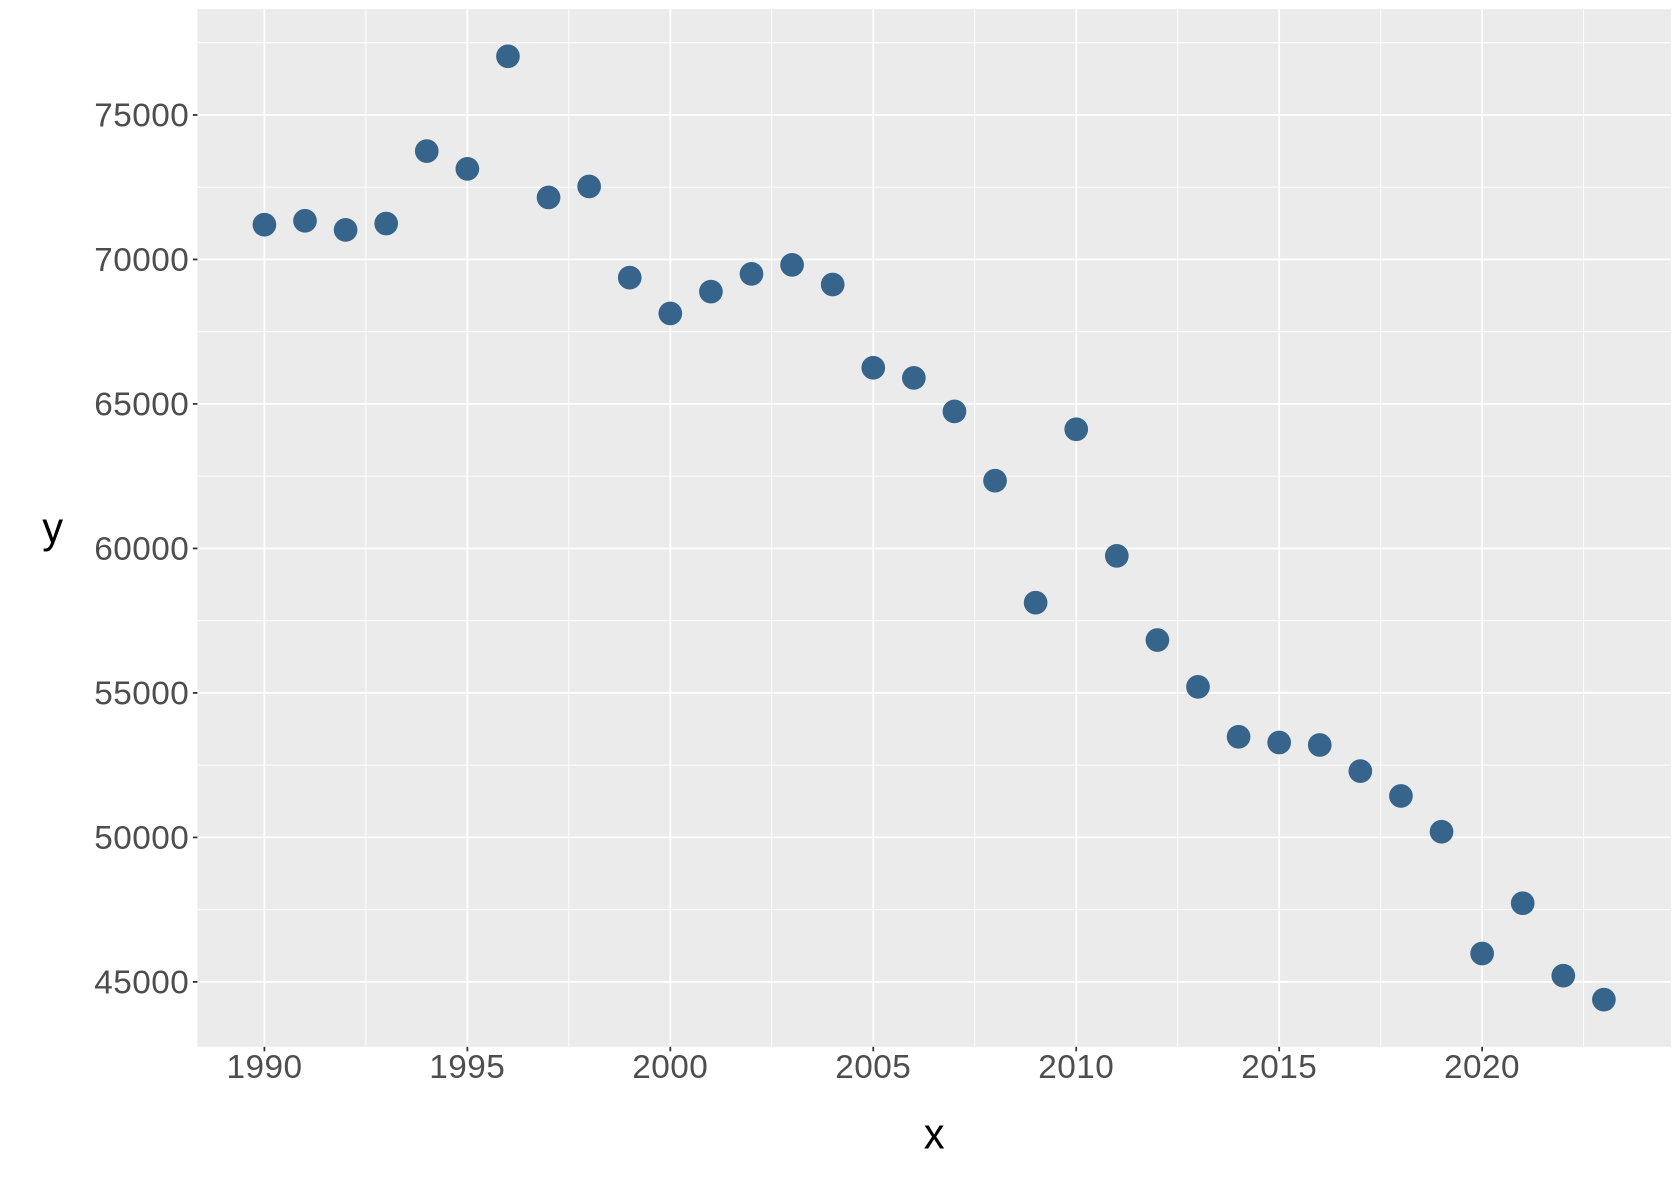

In [235]:
options(repr.plot.height = 10, repr.plot.width = 14)

col <- colnames(df)[3:ncol(df)] %>%
    sub("^X", "", .)

(x <- as.integer(col))

(y <- as.numeric(df[1, 3:ncol(df)]))

df_plot <- data.frame(x = x, y = y)

ggplot(df_plot, aes(x = x, y = y)) +
    geom_point(size = 6, color = "steelblue4") +
    theme(
        axis.title.x = element_text(size = 25, margin = margin(t = 20, b = 20)),
        axis.text.x = element_text(size = 20),
        axis.title.y = element_text(size = 25, margin = margin(r = 20, l = 20), angle = 0, vjust = 0.5),
        axis.text.y = element_text(size = 20),
    ) +
    scale_x_continuous(breaks = scales::breaks_width(5)) +
    scale_y_continuous(breaks = scales::breaks_width(5000))


### Linear regression

`geom_smooth()` using formula = 'y ~ x'


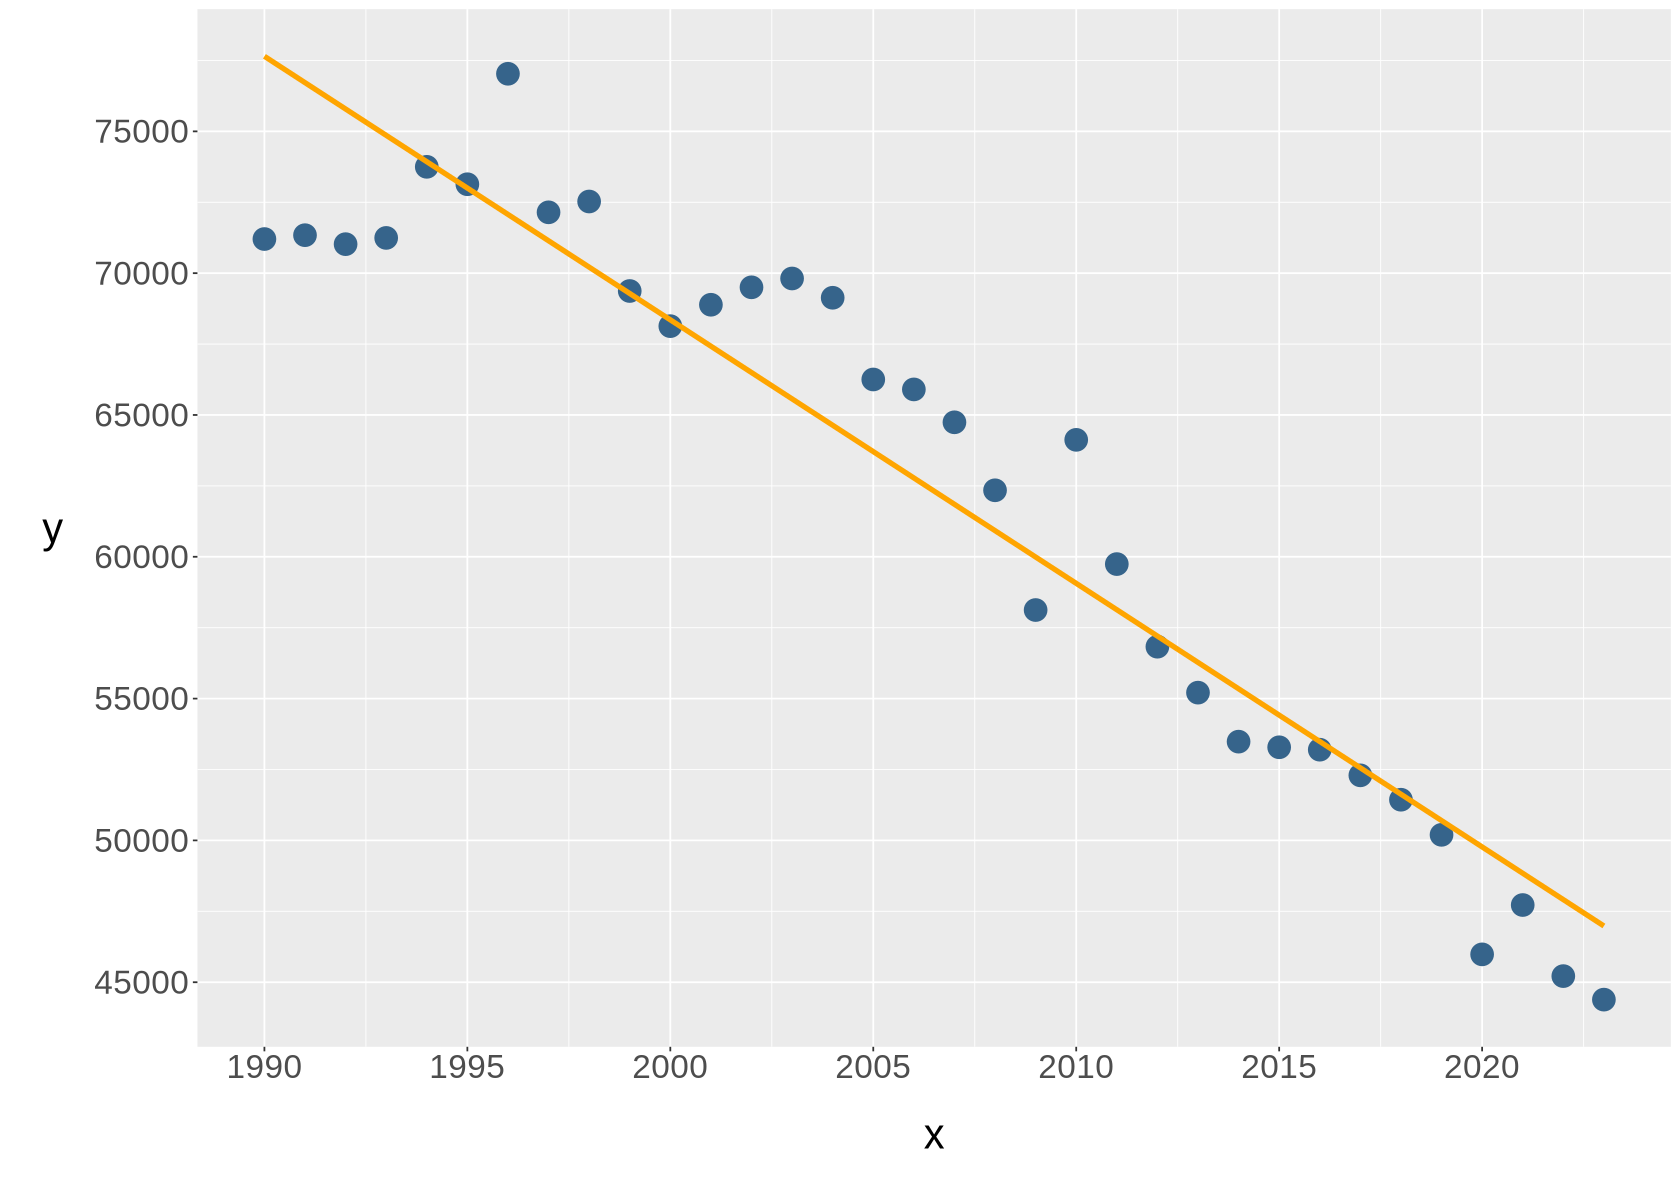

In [236]:
ggplot(df_plot, aes(x = x, y = y)) +
  geom_point(size = 6, color = "steelblue4") +
  geom_smooth(method = "lm", se = FALSE, color = "orange", linewidth = 1.5) +
  theme(
    axis.title.x = element_text(size = 25, margin = margin(t = 20, b = 20)),
    axis.text.x = element_text(size = 20),
    axis.title.y = element_text(size = 25, margin = margin(r = 20, l = 20), angle = 0, vjust = 0.5),
    axis.text.y = element_text(size = 20)
  ) +
  scale_x_continuous(breaks = scales::breaks_width(5)) +
  scale_y_continuous(breaks = scales::breaks_width(5000))


It looks good but the start is a bit off, let's try polynomial regression

### Polynomial regression

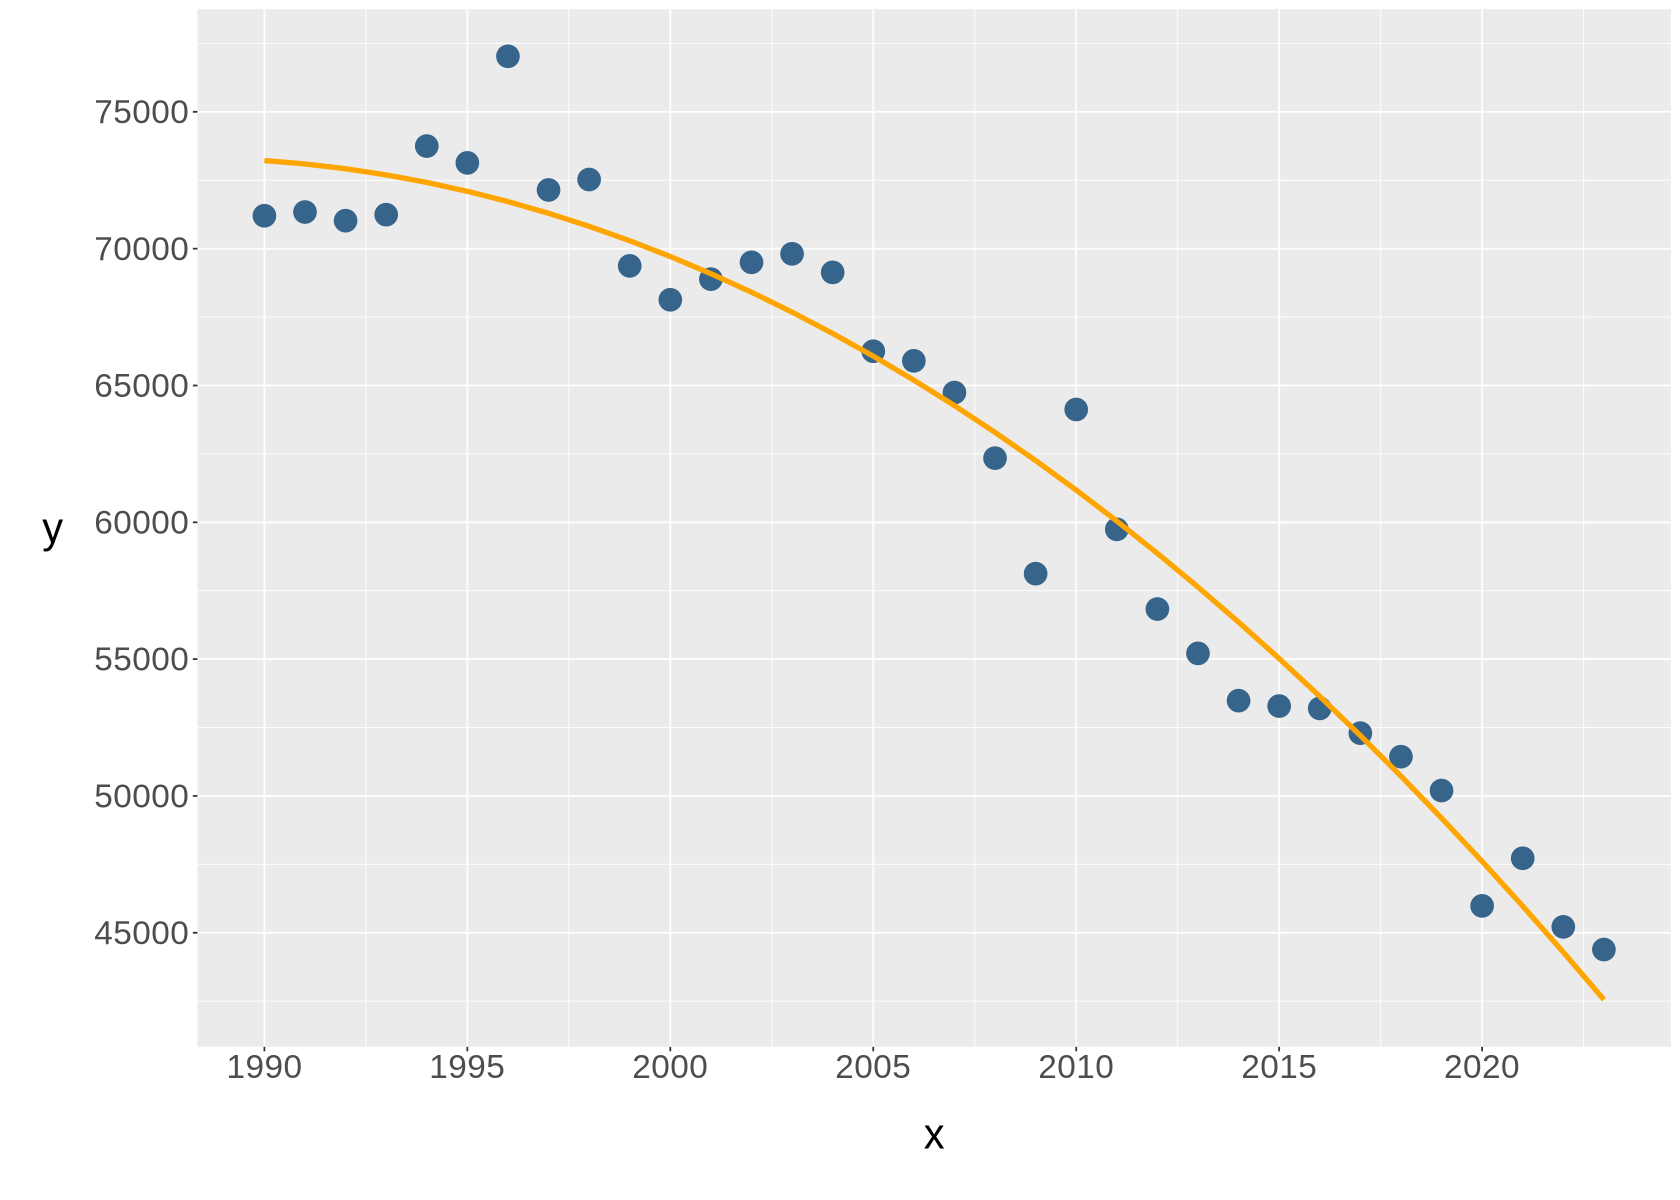

In [237]:
poly_fit <- lm(y ~ poly(x, 2, raw = TRUE), data = df_plot)
df_plot$ypoly_fit <- predict(poly_fit, newdata = df_plot)

ggplot(df_plot, aes(x = x, y = y)) +
  geom_point(size = 6, color = "steelblue4") +
  geom_line(aes(y = ypoly_fit), color = "orange", size = 1.5) +
  theme(
    axis.title.x = element_text(size = 25, margin = margin(t = 20, b = 20)),
    axis.text.x = element_text(size = 20),
    axis.title.y = element_text(size = 25, margin = margin(r = 20, l = 20), angle = 0, vjust = 0.5),
    axis.text.y = element_text(size = 20)
  ) +
  scale_x_continuous(breaks = scales::breaks_width(5)) +
  scale_y_continuous(breaks = scales::breaks_width(5000))


## Clustering


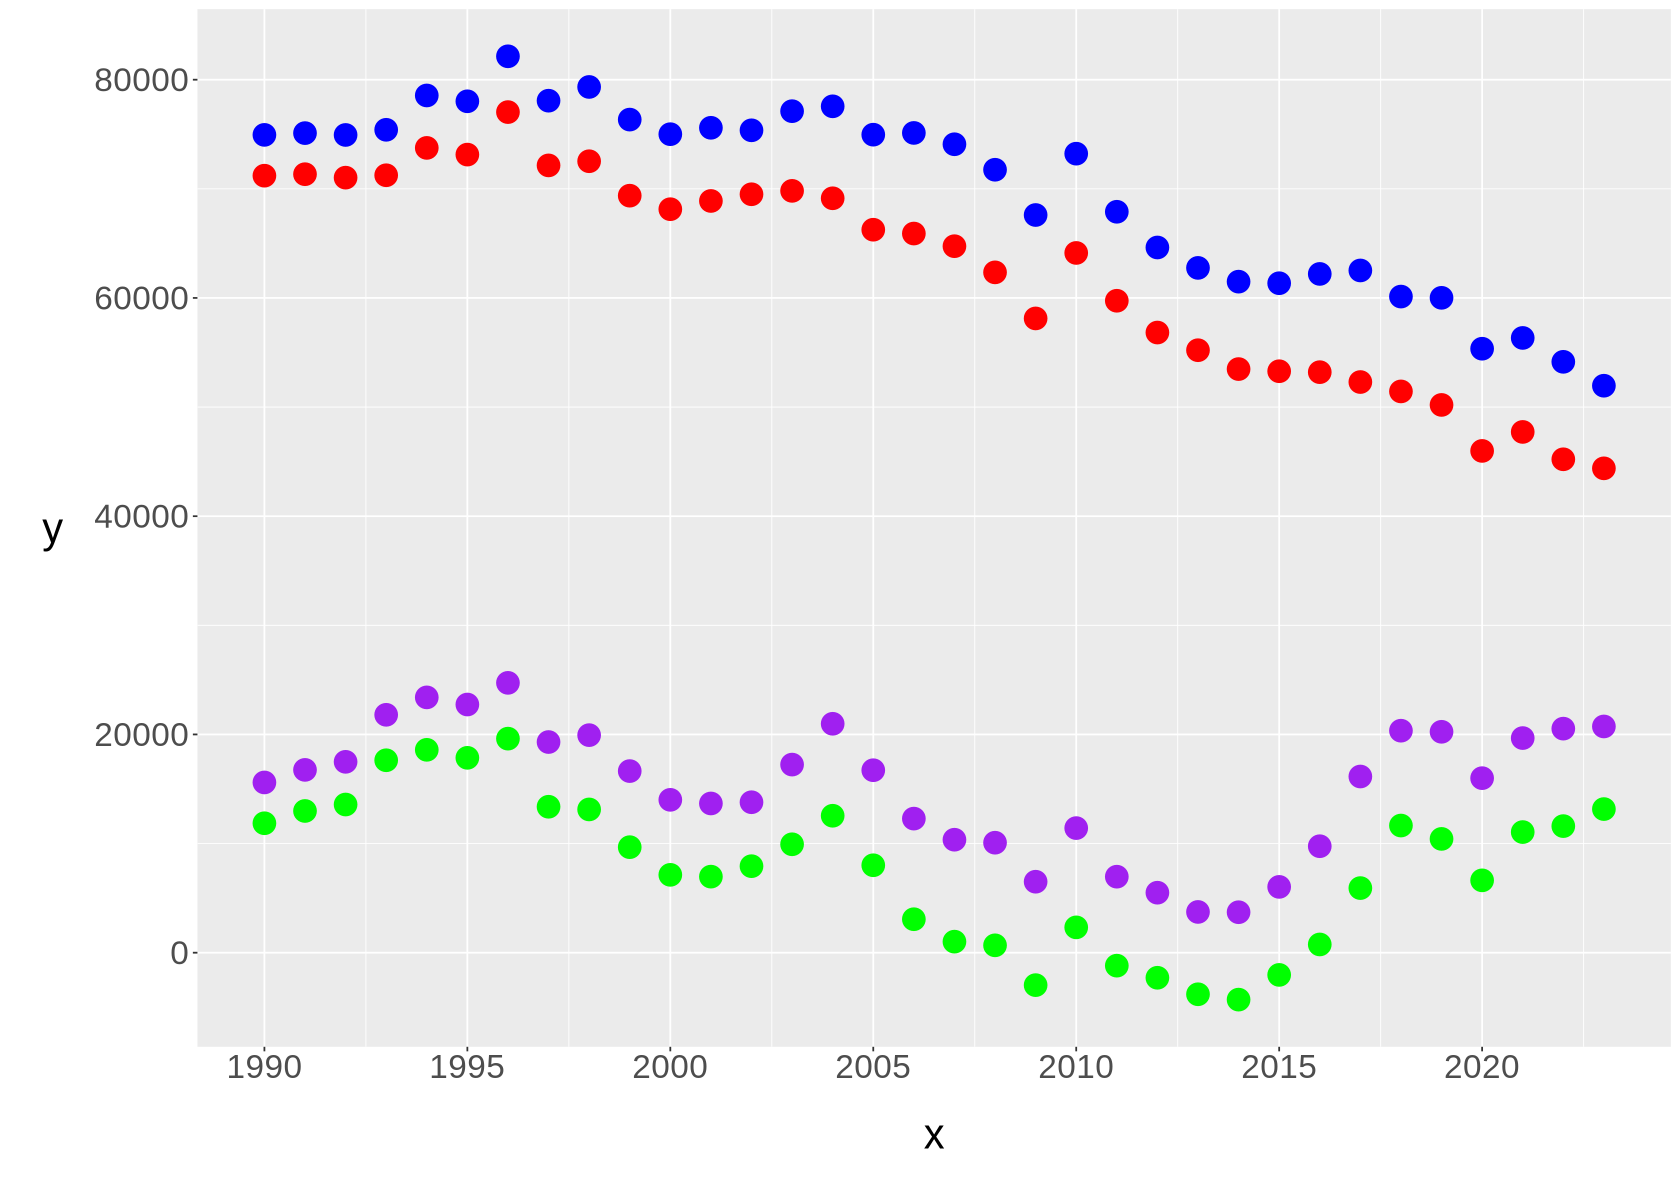

In [238]:
x <- as.integer(sub("^X", "", colnames(df)[3:ncol(df)]))
y_0 <- as.numeric(df[1, 3:ncol(df)])
y_1 <- as.numeric(df[2, 3:ncol(df)])
y_2 <- as.numeric(df[3, 3:ncol(df)])
y_3 <- as.numeric(df[4, 3:ncol(df)])

df0 <- data.frame(x = x, y = y_0, cluster = "Cluster 0")
df1 <- data.frame(x = x, y = y_1, cluster = "Cluster 1")
df2 <- data.frame(x = x, y = y_2, cluster = "Cluster 2")
df3 <- data.frame(x = x, y = y_3, cluster = "Cluster 3")

ggplot() +
    geom_point(data = df0, aes(x = x, y = y), color = "red", size = 6) +
    geom_point(data = df1, aes(x = x, y = y), color = "blue", size = 6) +
    geom_point(data = df2, aes(x = x, y = y), color = "green", size = 6) +
    geom_point(data = df3, aes(x = x, y = y), color = "purple", size = 6) +
    theme(
        axis.title.x = element_text(size = 25, margin = margin(t = 20, b = 20)),
        axis.text.x = element_text(size = 20),
        axis.title.y = element_text(size = 25, margin = margin(r = 20, l = 20), angle = 0, vjust = 0.5),
        axis.text.y = element_text(size = 20)
    ) +
    scale_x_continuous(breaks = scales::breaks_width(5))


#### Can we find back those clusters using k mean or GMM ?

### K Mean

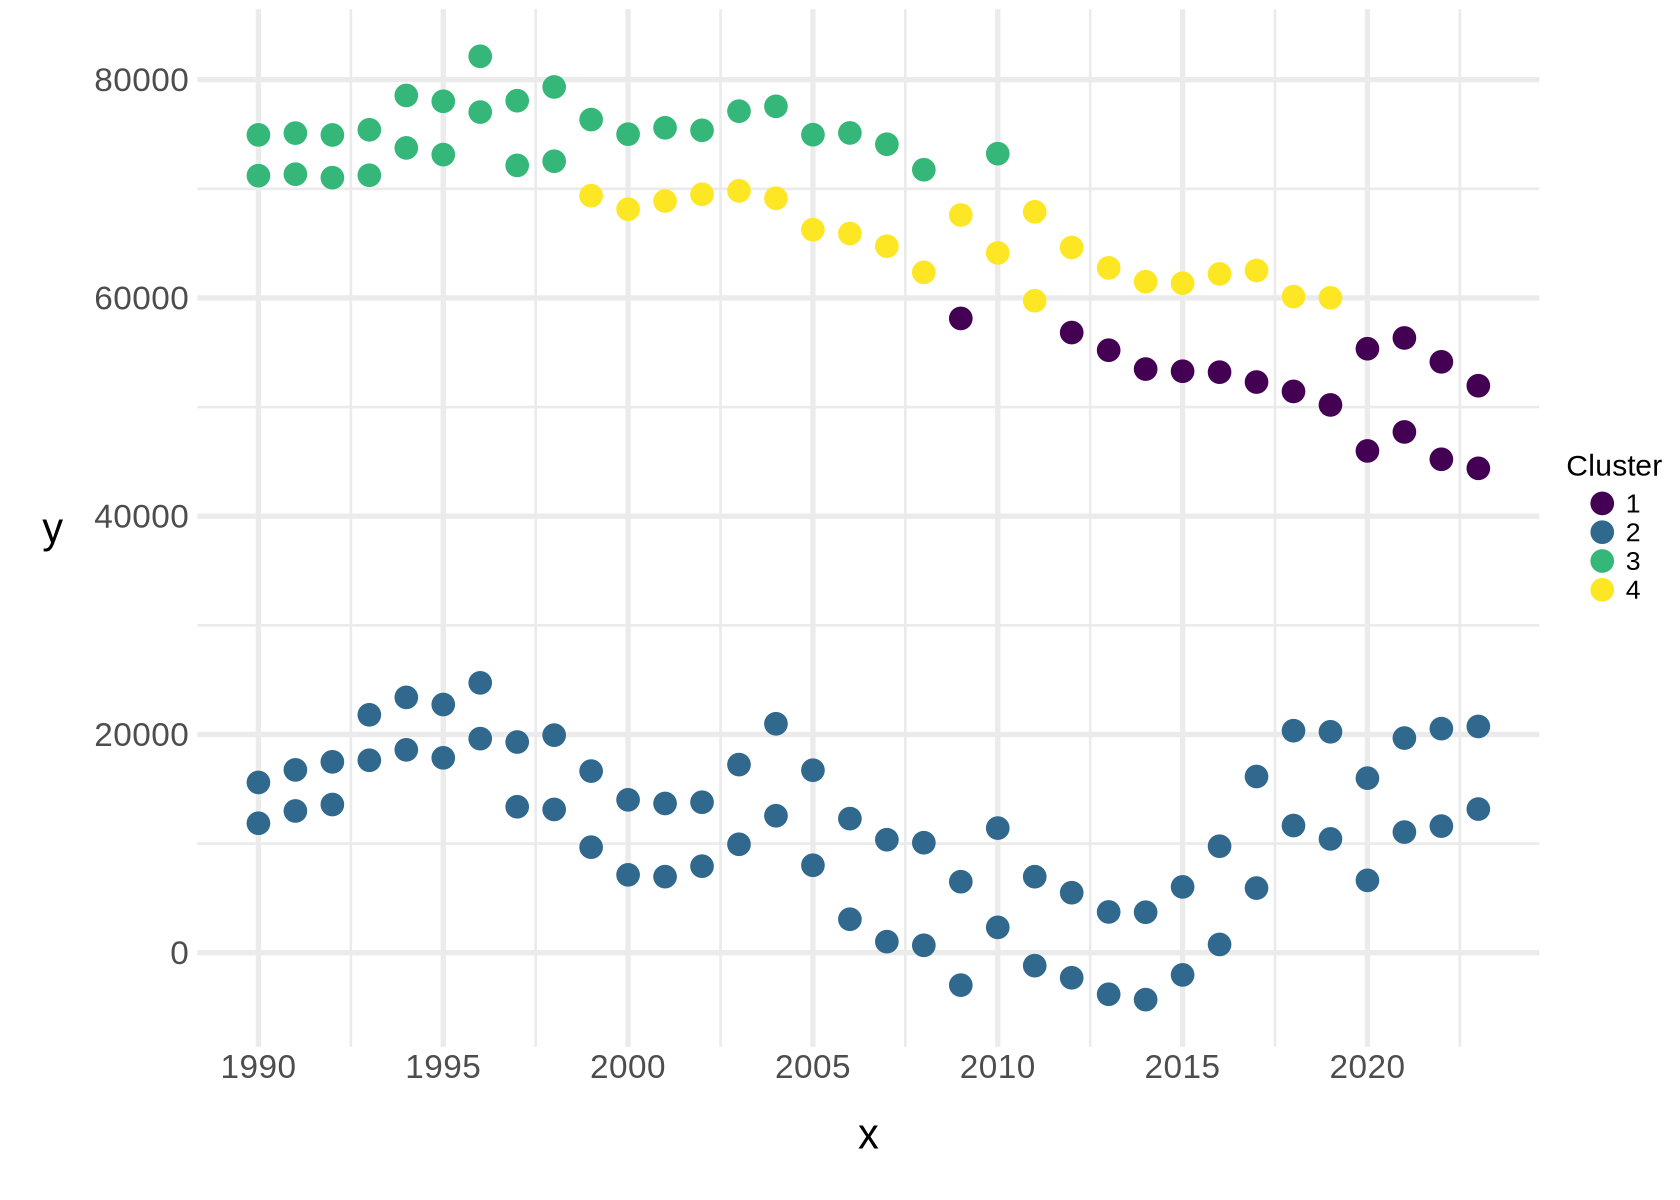

In [239]:
X <- do.call(rbind, list(
  cbind(x, y_0),
  cbind(x, y_1),
  cbind(x, y_2),
  cbind(x, y_3)
))

set.seed(1)
kmeans_result <- kmeans(X, centers = 4)

df_kmeans <- data.frame(
  x = X[, 1],
  y = X[, 2],
  cluster = factor(kmeans_result$cluster)
)

ggplot(df_kmeans, aes(x = x, y = y, color = cluster)) +
  geom_point(size = 6) +
  scale_color_viridis_d() +
  theme_minimal() +
  labs(color = "Cluster", x = "x", y = "y") +
  theme(
    axis.title.x = element_text(size = 25, margin = margin(t = 20, b = 20)),
    axis.text.x = element_text(size = 20),
    axis.title.y = element_text(size = 25, margin = margin(r = 20, l = 20), angle = 0, vjust = 0.5),
    axis.text.y = element_text(size = 20),
    legend.title = element_text(size = 18),
    legend.title.align = 0.5,
    legend.text = element_text(size = 16),
    panel.grid = element_line(size = 1.5)
  ) +
  scale_x_continuous(breaks = scales::breaks_width(5))


### Gaussian Mixture Model (GMM)

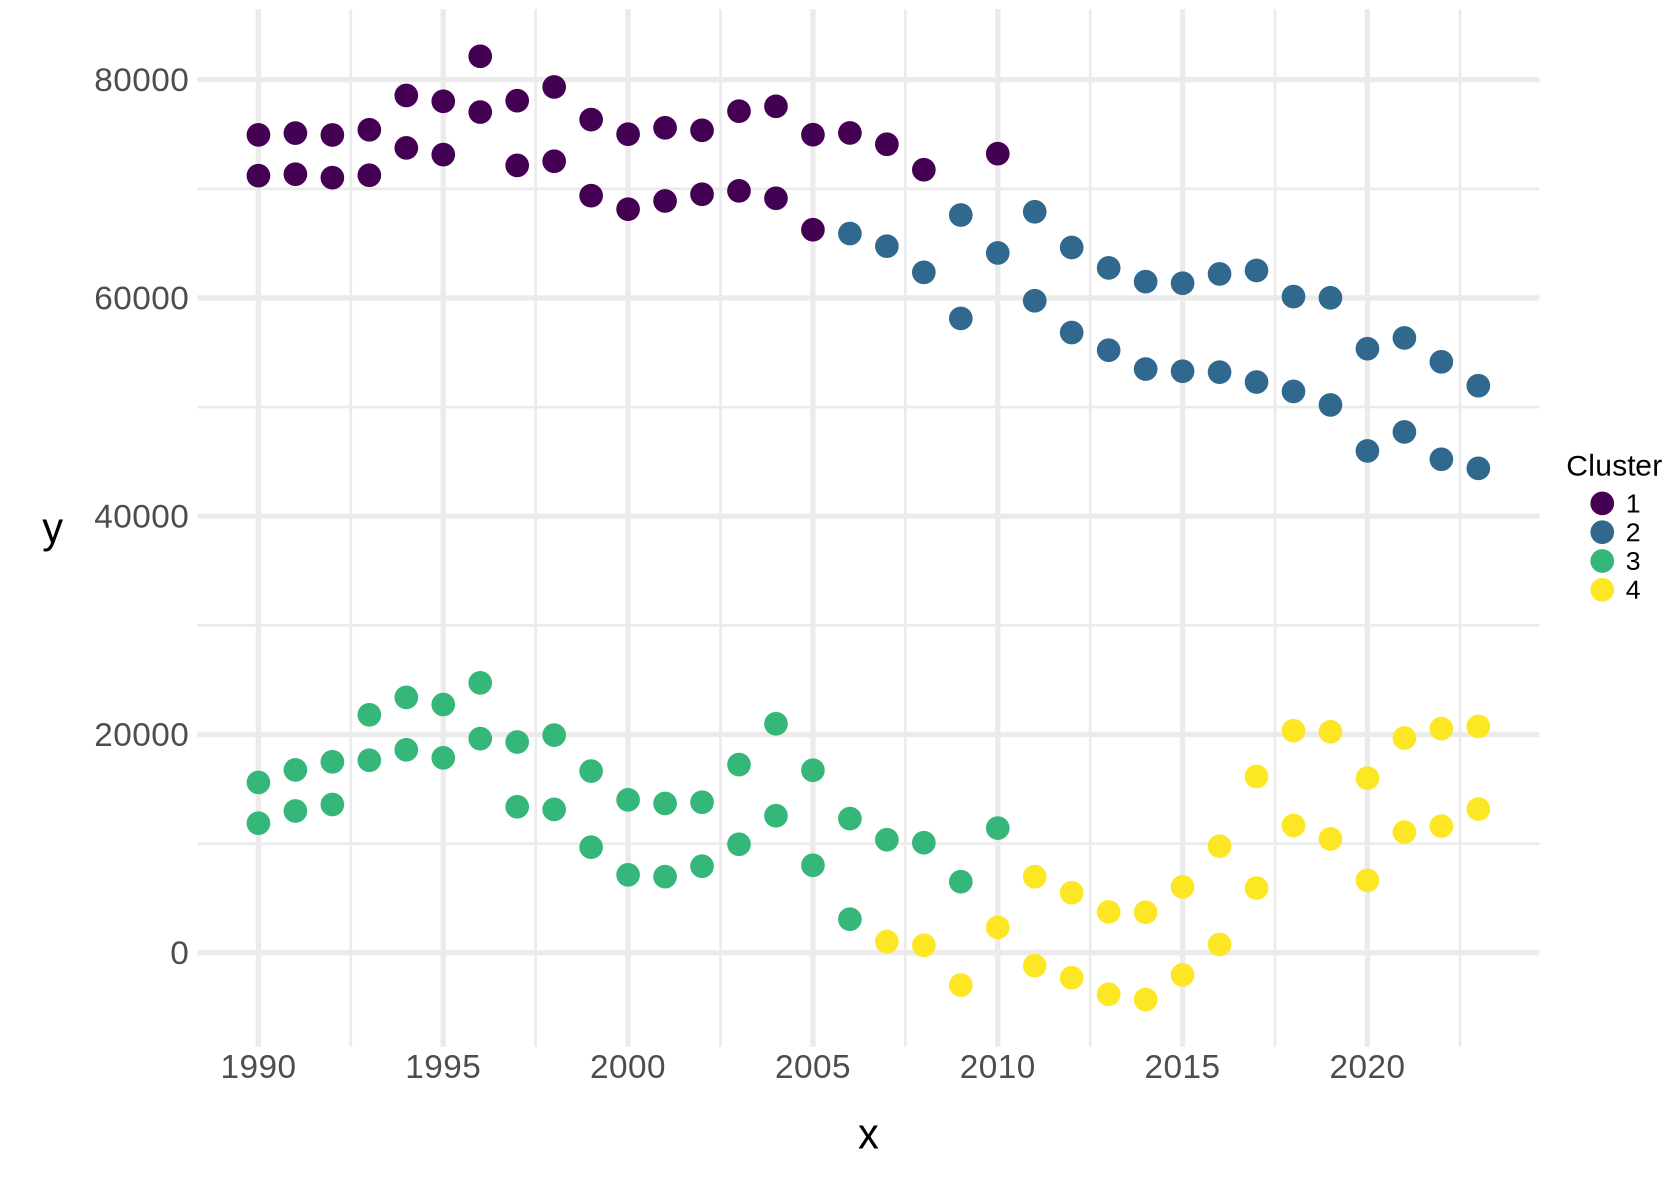

In [240]:
set.seed(0)
gmm_result <- Mclust(X, G = 4)

df_gmm <- data.frame(
  x = X[, 1],
  y = X[, 2],
  cluster = factor(gmm_result$classification)
)

ggplot(df_gmm, aes(x = x, y = y, color = cluster)) +
  geom_point(size = 6) +
  scale_color_viridis_d() +
  theme_minimal() +
  labs(color = "Cluster", x = "x", y = "y") +
  theme(
    axis.title.x = element_text(size = 25, margin = margin(t = 20, b = 20)),
    axis.text.x = element_text(size = 20),
    axis.title.y = element_text(size = 25, margin = margin(r = 20, l = 20), angle = 0, vjust = 0.5),
    axis.text.y = element_text(size = 20),
    legend.title = element_text(size = 18),
    legend.title.align = 0.5,
    legend.text = element_text(size = 16),
    panel.grid = element_line(size = 1.5)
  ) +
  scale_x_continuous(breaks = scales::breaks_width(5))

### Run GMM several times

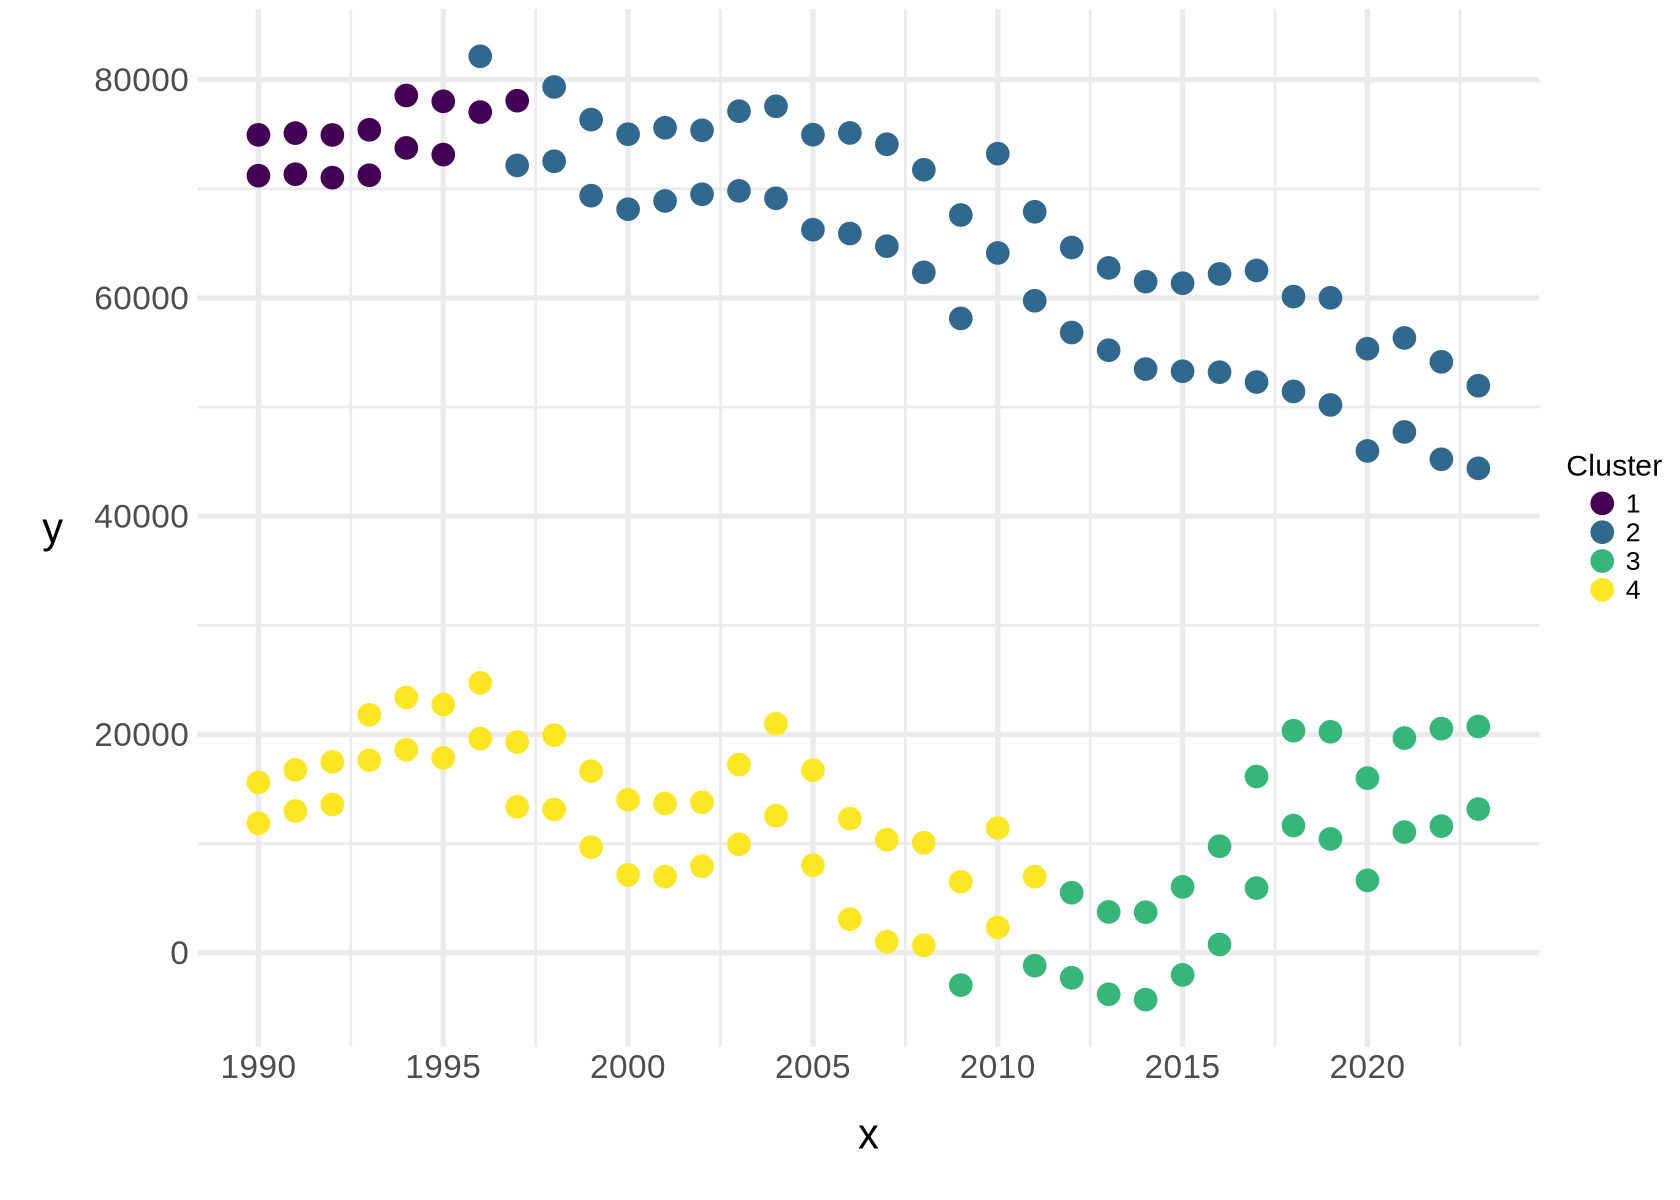

In [241]:
n_init <- 10

best_model <- NULL
best_loglik <- -Inf

for (i in 1:n_init) {
    idx <- sample(1:nrow(X))
    X_shuffled <- X[idx, , drop = FALSE]

    init <- list(hcPairs = hc(X_shuffled))

    model <- Mclust(
        X,
        G = 4,
        modelNames = "VVV",
        initialization = init
    )

    if (model$loglik > best_loglik) {
        best_loglik <- model$loglik
        best_model <- model
    }
}

df_gmm <- data.frame(
    x = X[, 1],
    y = X[, 2],
    cluster = factor(best_model$classification)
)

ggplot(df_gmm, aes(x = x, y = y, color = cluster)) +
    geom_point(size = 6) +
    scale_color_viridis_d() +
    theme_minimal() +
    labs(color = "Cluster", x = "x", y = "y") +
    theme(
        axis.title.x = element_text(size = 25, margin = margin(t = 20, b = 20)),
        axis.text.x = element_text(size = 20),
        axis.title.y = element_text(size = 25, margin = margin(r = 20, l = 20), angle = 0, vjust = 0.5),
        axis.text.y = element_text(size = 20),
        legend.title = element_text(size = 18),
        legend.title.align = 0.5,
        legend.text = element_text(size = 16),
        panel.grid = element_line(size = 1.5)
    ) +
    scale_x_continuous(breaks = scales::breaks_width(5))


## Decision tree

We saw that we can't really find our category from a cluster, but can a machine learning algorithm find them?

### Split the data into train test split

In [242]:
set.seed(42)
Y <- rep(0:3, each = length(x))

n <- nrow(X)
train_indices <- sample(1:n, size = 0.8 * n)

X_train <- X[train_indices, , drop = FALSE]
X_test <- X[-train_indices, , drop = FALSE]

y_train <- Y[train_indices]
y_test <- Y[-train_indices]

### Create and train the decision tree

In [243]:
train_df <- as.data.frame(X_train)
train_df$y <- as.factor(y_train)

test_df <- as.data.frame(X_test)
test_df$y <- as.factor(y_test)

tree_spec <- decision_tree() %>%
    set_engine("rpart", model = TRUE) %>%
    set_mode("classification")

tree_fit <- fit(tree_spec, y ~ ., data = train_df)

y_pred <- predict(tree_fit, new_data = test_df)

### Evaluate the decision tree performance

In [244]:
y_pred_factor <- y_pred$.pred_class
y_test_factor <- factor(test_df$y)

absolute_error <- sum(y_test_factor != y_pred_factor)
print(paste("Absolute error:", absolute_error))

accuracy_val <- accuracy_vec(truth = y_test_factor, estimate = y_pred_factor)
print(paste("Accuracy:", accuracy_val))

f1_macro <- f_meas_vec(truth = y_test_factor, estimate = y_pred_factor, estimator = "macro")
print(paste("F1-score (macro):", f1_macro))

f1_weighted <- f_meas_vec(truth = y_test_factor, estimate = y_pred_factor, estimator = "macro_weighted")
print(paste("F1-score (weighted):", f1_weighted))


[1] "Absolute error: 6"
[1] "Accuracy: 0.785714285714286"
[1] "F1-score (macro): 0.78125"
[1] "F1-score (weighted): 0.787202380952381"


### Plot a confusion matrix

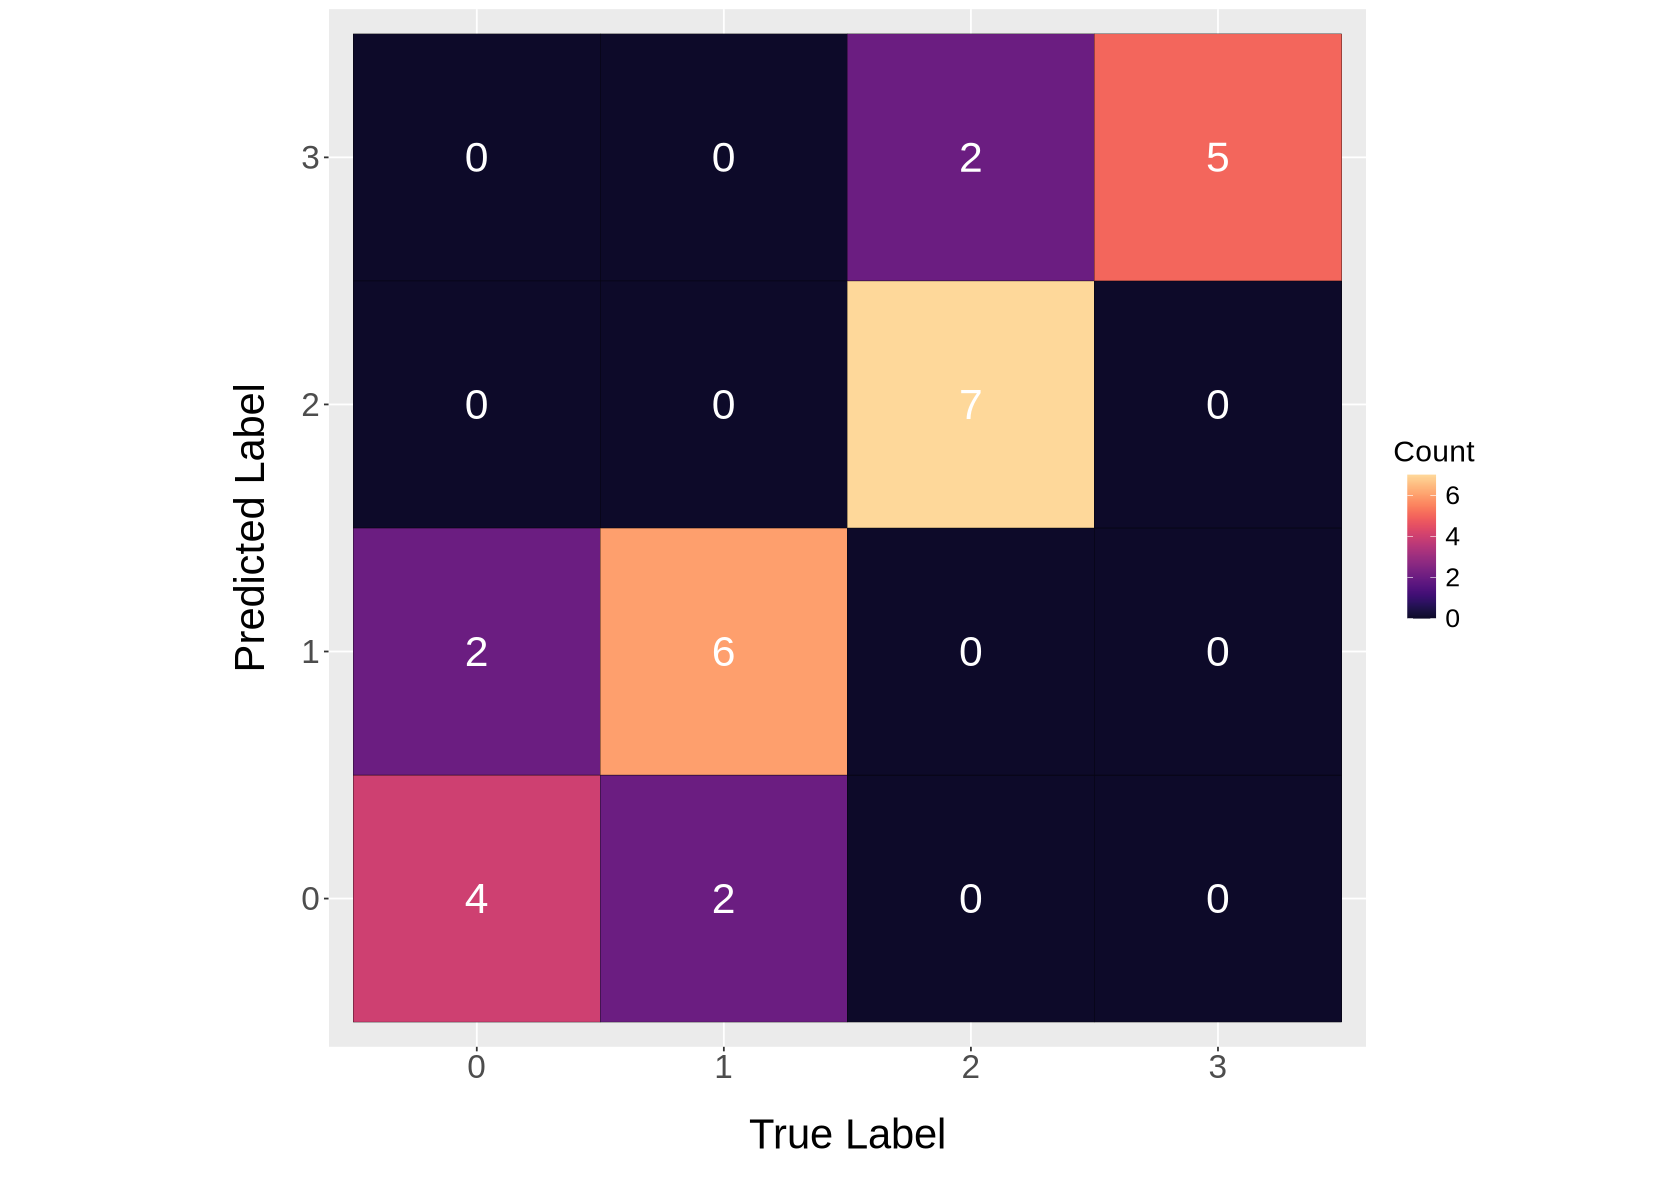

In [245]:
conf_mat <- caret::confusionMatrix(y_pred_factor, y_test_factor)
conf_df <- as.data.frame(conf_mat$table)

ggplot(conf_df, aes(x = Reference, y = Prediction, fill = Freq)) +
    geom_tile(color = "black") +
    geom_text(aes(label = Freq), color = "white", size = 9) +
    scale_fill_gradientn(colors = magma(256)[20:236]) +
    labs(x = "True Label", y = "Predicted Label", fill = "Count") +
    coord_fixed() +
    theme(
        axis.title.x = element_text(size = 25, margin = margin(t = 20, b = 20)),
        axis.text.x = element_text(size = 20),
        axis.title.y = element_text(size = 25, margin = margin(r = 20, l = 20), angle = 90, vjust = 0.5),
        axis.text.y = element_text(size = 20),
        legend.title = element_text(size = 18),
        legend.title.align = 0.5,
        legend.text = element_text(size = 16),
        
    )

We see that if often makes mistake on class 1 and predict 0. But there is very little test data so it might not be reliable. Nonetheless the accuracy is ok at 0.78.

### Plot the decision tree
#### What does the tree looks like to give this result ?

Warning message:
“cex and tweak both specified, applying both”


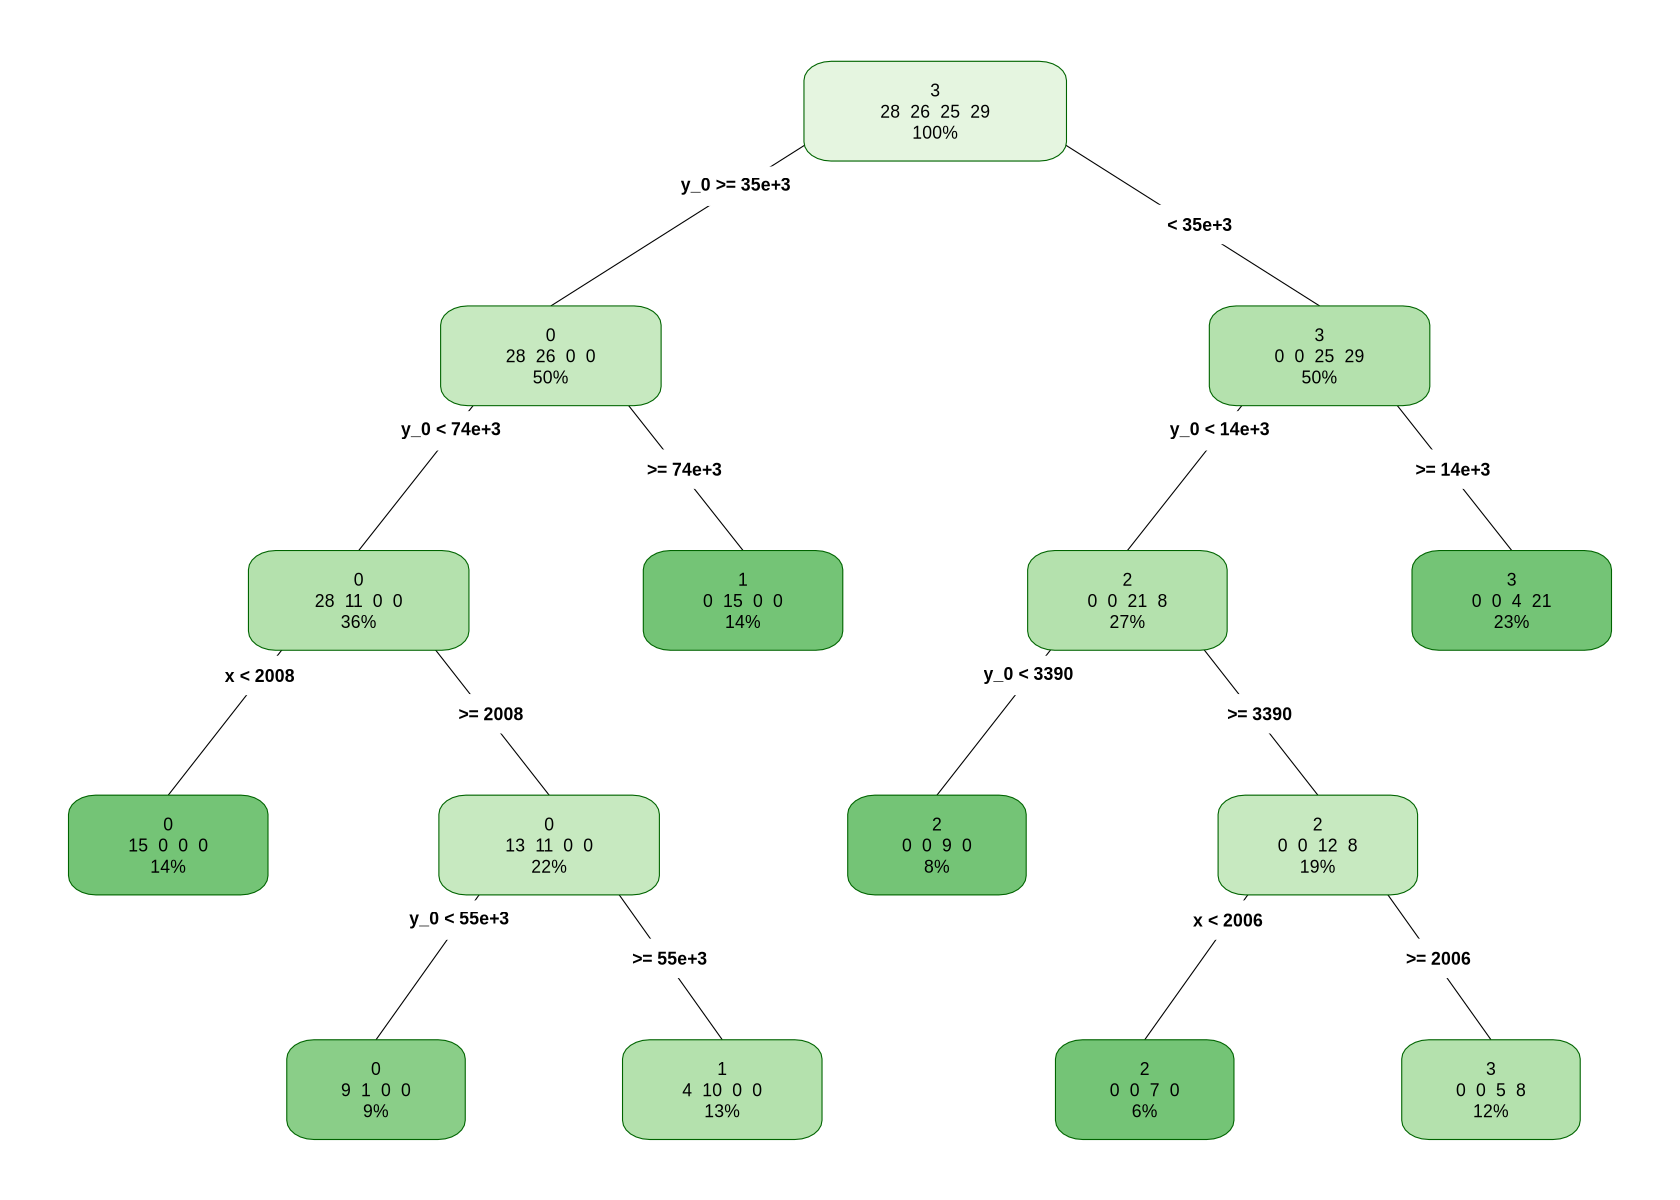

In [246]:
tree_model <- tree_fit$fit

par(bg = "white")

rpart.plot(tree_model,
    type = 4,
    extra = 101,
    fallen.leaves = FALSE,
    cex = 0.8,
    tweak = 1.1,
    box.palette = "Greens",
    border.col = "darkgreen")



## SVM

In [247]:
svm_model <- ksvm(y ~ ., data = train_df, kernel = "vanilladot", C = 1)
y_pred_svm <- predict(svm_model, newdata = test_df)
accuracy <- mean(y_pred_svm == test_df$y)
print(paste("Accuracy:", accuracy))


 Setting default kernel parameters  
[1] "Accuracy: 0.75"


# Exercice 5 
## Permutation feature importance

### importing again, to be clear 

In [248]:
df <- read.csv("../Total air emissions by greenhouse gas.csv")


### cleaning data, remplacing NaN per the mean for each columns, for more data

In [249]:
safe_numeric <- function(x) {
    suppressWarnings(num <- as.numeric(x))
    return(num)
}

replace_na_by_mean <- function(vec) {
    vec[is.na(vec)] <- mean(vec, na.rm = TRUE)
    return(vec)
}

cols <- colnames(df)[3:ncol(df)]

df[cols] <- lapply(df[cols], safe_numeric)

df[cols] <- lapply(df[cols], replace_na_by_mean)




### created a new target : did the consumption grow or not between 2023 and 1990 ? 

In [250]:
df$growth <- df$X2023 - df$X1990

df$target <- ifelse(df$growth > 0, 1, 0)

cols <- colnames(df)[3:(ncol(df)-2)]

X <- df[, cols]

y <- df$target

cat("Shape X:", dim(X), "\n")
cat("Shape y:", length(y), "\n")

Shape X: 154 34 
Shape y: 154 


In [254]:
n <- nrow(X)
train_indices <- sample(1:n, size = 0.8 * n)

X_train <- X[train_indices, , drop = FALSE]
X_test  <- X[-train_indices, , drop = FALSE]

y_train <- y[train_indices]
y_test  <- y[-train_indices]

train_df <- data.frame(y = as.factor(y_train), X_train)
test_df <- data.frame(y = as.factor(y_test), X_test)

svm_model <- ksvm(y ~ ., data = train_df, kernel = "rbfdot", C = 1, kpar = list(sigma = 0.0001))

y_pred_svm <- predict(svm_model, newdata = test_df)
accuracy <- mean(y_pred_svm == test_df$y)
print(paste("Accuracy:", accuracy))

[1] "Accuracy: 0.838709677419355"
